In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_leste = pd.read_csv("dataset_leste.csv")
dataset_nordeste = pd.read_csv("dataset_nordeste.csv")
dataset_noroeste = pd.read_csv("dataset_noroeste.csv")
dataset_norte = pd.read_csv("dataset_norte.csv")
dataset_oeste = pd.read_csv("dataset_oeste.csv")
dataset_sudeste = pd.read_csv("dataset_sudeste.csv")
dataset_sudoeste = pd.read_csv("dataset_sudoeste.csv")
dataset_sul = pd.read_csv("dataset_sul.csv")

In [4]:
import math

In [5]:
def append_data(datas):
    data_frame = []
    columns = datas[0].columns
        
    for i in range(0, len(datas)):
        
        data = datas[i]
        
        for j in range(0, len(columns)):
            
            if len(data_frame) <= j:
                data_frame.append(list(np.array(data[columns[j]])))
            else:
                for val in np.array(data[columns[j]]):
                    data_frame[j].append(val)                
                    
    return pd.DataFrame.from_records(np.transpose(data_frame), columns = columns)

In [6]:
def get_theta(data, t):
    theta = np.ones(len(data["x1"]))
    data["theta"] = theta*t
    return data

In [7]:
dataset_norte = get_theta(dataset_norte,0)
dataset_noroeste = get_theta(dataset_noroeste,math.pi/4.0)
dataset_oeste = get_theta(dataset_oeste,math.pi/2.0)
dataset_sudoeste = get_theta(dataset_sudoeste,math.pi*3.0/4.0)
dataset_sul = get_theta(dataset_sul,math.pi)

dataset_sudeste = get_theta(dataset_sudeste, -math.pi)
dataset_leste = get_theta(dataset_leste, -math.pi/2.0)
dataset_nordeste = get_theta(dataset_nordeste,-math.pi/4.0)

In [8]:
data_frame = append_data((
    dataset_norte,
    dataset_noroeste,
    dataset_oeste,
    dataset_sudoeste,
    dataset_sul,
    dataset_sudeste,
    dataset_leste,
    dataset_nordeste
    ))

In [9]:
import matplotlib.pyplot as plt

In [10]:
def visualizar(y_pred):
    plt.title("Resultado")
    axes = plt.gca()
    #axes.set_xlim([-0,400])
    #axes.set_ylim([-0,2*math.pi])
    plt.plot(y_pred)
    plt.ylabel('theta')
    plt.xlabel('times')
    plt.show()

In [11]:
data_frame

,x1,x2,x3,x4,x5,x6,theta
0,0.5,0.1,0.2,0.0,0.7,0.6,0.000000
1,0.5,0.1,0.2,0.0,0.7,0.6,0.000000
2,0.5,0.1,0.2,0.0,0.7,0.6,0.000000
3,0.5,0.1,0.2,0.0,0.7,0.6,0.000000
4,0.5,0.1,0.2,0.0,0.7,0.6,0.000000
...,...,...,...,...,...,...,...
5661,0.6,-0.3,-0.4,-0.1,0.8,0.3,-0.785398
5662,0.6,-0.3,-0.4,-0.1,0.8,0.3,-0.785398
5663,0.6,-0.3,-0.4,-0.1,0.8,0.3,-0.785398
5664,0.6,-0.3,-0.4,-0.2,0.8,0.3,-0.785398


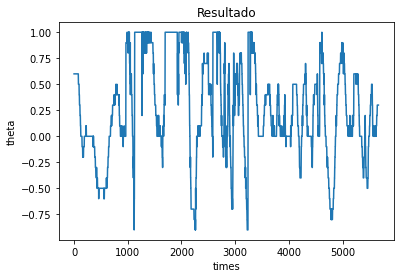

In [14]:
visualizar(data_frame['x6'])

## Modelo redes neurais com Tensorflow

In [15]:
import tensorflow as tf

In [47]:
def regressor_conv():

    inputs = tf.keras.Input(shape=(6,1))
    extract = tf.keras.layers.Conv1D(18, 3)(inputs)    
    extract = tf.keras.layers.Conv1D(36, 3)(extract)
    extract = tf.keras.layers.Conv1D(36, 2)(extract)
    one_d = tf.keras.layers.Flatten()(extract)

    dense = tf.keras.layers.Dense(1)(one_d)

    model = tf.keras.Model(inputs=inputs, outputs=dense)
    
    model.summary()
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model

In [19]:
def theta_regressor():
    
    inputs = tf.keras.Input(shape=(4,))
    
    dense = tf.keras.layers.Dense(3, activation='tanh')(inputs)
    #dense = tf.keras.layers.Dense(4)(dense)
    dense = tf.keras.layers.Dense(1)(dense)
    
    model = tf.keras.Model(inputs=inputs, outputs=dense)
    
    model.summary()
    
    model.compile(
        optimizer=tf.optimizers.Adam(),
        loss='mse',
        metrics=['mae', 'mse']
    )
    
    return model

In [20]:
data_frame = data_frame.sample(frac = 1)
y = data_frame['theta']
X = data_frame.drop(['theta',"x3","x4"], axis=1)

model = theta_regressor()

history = model.fit(x = X,
                    y = y,
                    epochs = 1000,
                    batch_size = 1000,
                    validation_split = 0.2
                   )


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
5/5 [==============================] - 1s 37ms/step - loss: 4.3843 - mae: 1.8018 - mse: 4.3843 - val_loss: 4.2168 - val_mae: 1.7646 - val_mse: 4.2168
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 4.3423 - mae: 1.7920 - mse: 4.3423 - val_loss: 4.1791 - val_mae: 1.7557 - val_mse: 4.1791
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss

Epoch 47/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.4801 - mae: 1.5251 - mse: 3.4801 - val_loss: 3.4416 - val_mae: 1.5153 - val_mse: 3.4416
Epoch 48/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.4742 - mae: 1.5229 - mse: 3.4742 - val_loss: 3.4371 - val_mae: 1.5131 - val_mse: 3.4371
Epoch 49/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.4685 - mae: 1.5207 - mse: 3.4685 - val_loss: 3.4329 - val_mae: 1.5111 - val_mse: 3.4329
Epoch 50/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.4630 - mae: 1.5187 - mse: 3.4630 - val_loss: 3.4288 - val_mae: 1.5091 - val_mse: 3.4288
Epoch 51/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.4576 - mae: 1.5166 - mse: 3.4576 - val_loss: 3.4248 - val_mae: 1.5072 - val_mse: 3.4248
Epoch 52/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.4525 - mae: 1.5146 - mse: 3.4525 - val_loss: 3.4210 - val_mae: 1.5052 - val_mse: 3.4210
Epoch 53/1000
5/5 [===

5/5 [==============================] - 0s 6ms/step - loss: 3.2890 - mae: 1.4174 - mse: 3.2890 - val_loss: 3.2855 - val_mae: 1.4106 - val_mse: 3.2855
Epoch 98/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.2857 - mae: 1.4151 - mse: 3.2857 - val_loss: 3.2825 - val_mae: 1.4084 - val_mse: 3.2825
Epoch 99/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.2825 - mae: 1.4128 - mse: 3.2825 - val_loss: 3.2795 - val_mae: 1.4061 - val_mse: 3.2795
Epoch 100/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.2795 - mae: 1.4104 - mse: 3.2795 - val_loss: 3.2764 - val_mae: 1.4037 - val_mse: 3.2764
Epoch 101/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.2763 - mae: 1.4081 - mse: 3.2763 - val_loss: 3.2734 - val_mae: 1.4015 - val_mse: 3.2734
Epoch 102/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.2730 - mae: 1.4058 - mse: 3.2730 - val_loss: 3.2704 - val_mae: 1.3993 - val_mse: 3.2704
Epoch 103/1000
5/5 [=============

5/5 [==============================] - 0s 7ms/step - loss: 3.1513 - mae: 1.3196 - mse: 3.1513 - val_loss: 3.1467 - val_mae: 1.3152 - val_mse: 3.1467
Epoch 148/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.1490 - mae: 1.3180 - mse: 3.1490 - val_loss: 3.1443 - val_mae: 1.3137 - val_mse: 3.1443
Epoch 149/1000
5/5 [==============================] - 0s 5ms/step - loss: 3.1468 - mae: 1.3166 - mse: 3.1468 - val_loss: 3.1420 - val_mae: 1.3123 - val_mse: 3.1420
Epoch 150/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.1446 - mae: 1.3152 - mse: 3.1446 - val_loss: 3.1396 - val_mae: 1.3110 - val_mse: 3.1396
Epoch 151/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.1424 - mae: 1.3139 - mse: 3.1424 - val_loss: 3.1373 - val_mae: 1.3095 - val_mse: 3.1373
Epoch 152/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.1402 - mae: 1.3125 - mse: 3.1402 - val_loss: 3.1350 - val_mae: 1.3082 - val_mse: 3.1350
Epoch 153/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 3.0566 - mae: 1.2629 - mse: 3.0566 - val_loss: 3.0445 - val_mae: 1.2572 - val_mse: 3.0445
Epoch 198/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.0549 - mae: 1.2619 - mse: 3.0549 - val_loss: 3.0428 - val_mae: 1.2561 - val_mse: 3.0428
Epoch 199/1000
5/5 [==============================] - 0s 7ms/step - loss: 3.0533 - mae: 1.2610 - mse: 3.0533 - val_loss: 3.0410 - val_mae: 1.2552 - val_mse: 3.0410
Epoch 200/1000
5/5 [==============================] - 0s 8ms/step - loss: 3.0517 - mae: 1.2602 - mse: 3.0517 - val_loss: 3.0393 - val_mae: 1.2543 - val_mse: 3.0393
Epoch 201/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.0500 - mae: 1.2594 - mse: 3.0500 - val_loss: 3.0375 - val_mae: 1.2535 - val_mse: 3.0375
Epoch 202/1000
5/5 [==============================] - 0s 6ms/step - loss: 3.0485 - mae: 1.2586 - mse: 3.0485 - val_loss: 3.0358 - val_mae: 1.2526 - val_mse: 3.0358
Epoch 203/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 2.9810 - mae: 1.2307 - mse: 2.9810 - val_loss: 2.9611 - val_mae: 1.2221 - val_mse: 2.9611
Epoch 248/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9795 - mae: 1.2301 - mse: 2.9795 - val_loss: 2.9595 - val_mae: 1.2216 - val_mse: 2.9595
Epoch 249/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9782 - mae: 1.2297 - mse: 2.9782 - val_loss: 2.9580 - val_mae: 1.2210 - val_mse: 2.9580
Epoch 250/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9767 - mae: 1.2292 - mse: 2.9767 - val_loss: 2.9564 - val_mae: 1.2206 - val_mse: 2.9564
Epoch 251/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9753 - mae: 1.2288 - mse: 2.9753 - val_loss: 2.9549 - val_mae: 1.2201 - val_mse: 2.9549
Epoch 252/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.9739 - mae: 1.2283 - mse: 2.9739 - val_loss: 2.9533 - val_mae: 1.2195 - val_mse: 2.9533
Epoch 253/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 2.9139 - mae: 1.2084 - mse: 2.9139 - val_loss: 2.8868 - val_mae: 1.1973 - val_mse: 2.8868
Epoch 298/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.9126 - mae: 1.2081 - mse: 2.9126 - val_loss: 2.8854 - val_mae: 1.1970 - val_mse: 2.8854
Epoch 299/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9114 - mae: 1.2079 - mse: 2.9114 - val_loss: 2.8840 - val_mae: 1.1966 - val_mse: 2.8840
Epoch 300/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9101 - mae: 1.2077 - mse: 2.9101 - val_loss: 2.8824 - val_mae: 1.1965 - val_mse: 2.8824
Epoch 301/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9088 - mae: 1.2076 - mse: 2.9088 - val_loss: 2.8810 - val_mae: 1.1962 - val_mse: 2.8810
Epoch 302/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.9076 - mae: 1.2073 - mse: 2.9076 - val_loss: 2.8797 - val_mae: 1.1958 - val_mse: 2.8797
Epoch 303/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 2.8545 - mae: 1.1979 - mse: 2.8545 - val_loss: 2.8210 - val_mae: 1.1845 - val_mse: 2.8210
Epoch 348/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8534 - mae: 1.1978 - mse: 2.8534 - val_loss: 2.8199 - val_mae: 1.1843 - val_mse: 2.8199
Epoch 349/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8523 - mae: 1.1976 - mse: 2.8523 - val_loss: 2.8187 - val_mae: 1.1841 - val_mse: 2.8187
Epoch 350/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8512 - mae: 1.1976 - mse: 2.8512 - val_loss: 2.8174 - val_mae: 1.1841 - val_mse: 2.8174
Epoch 351/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8501 - mae: 1.1975 - mse: 2.8501 - val_loss: 2.8163 - val_mae: 1.1837 - val_mse: 2.8163
Epoch 352/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8490 - mae: 1.1972 - mse: 2.8490 - val_loss: 2.8151 - val_mae: 1.1836 - val_mse: 2.8151
Epoch 353/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 2.8055 - mae: 1.1929 - mse: 2.8055 - val_loss: 2.7681 - val_mae: 1.1778 - val_mse: 2.7681
Epoch 398/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8046 - mae: 1.1930 - mse: 2.8046 - val_loss: 2.7672 - val_mae: 1.1777 - val_mse: 2.7672
Epoch 399/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8037 - mae: 1.1930 - mse: 2.8037 - val_loss: 2.7663 - val_mae: 1.1777 - val_mse: 2.7663
Epoch 400/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8030 - mae: 1.1931 - mse: 2.8030 - val_loss: 2.7653 - val_mae: 1.1778 - val_mse: 2.7653
Epoch 401/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.8021 - mae: 1.1931 - mse: 2.8021 - val_loss: 2.7645 - val_mae: 1.1776 - val_mse: 2.7645
Epoch 402/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.8013 - mae: 1.1930 - mse: 2.8013 - val_loss: 2.7637 - val_mae: 1.1775 - val_mse: 2.7637
Epoch 403/1000
5/5 [===========

5/5 [==============================] - 0s 7ms/step - loss: 2.7700 - mae: 1.1929 - mse: 2.7700 - val_loss: 2.7300 - val_mae: 1.1768 - val_mse: 2.7300
Epoch 448/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7694 - mae: 1.1930 - mse: 2.7694 - val_loss: 2.7294 - val_mae: 1.1768 - val_mse: 2.7294
Epoch 449/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7688 - mae: 1.1929 - mse: 2.7688 - val_loss: 2.7290 - val_mae: 1.1766 - val_mse: 2.7290
Epoch 450/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7682 - mae: 1.1926 - mse: 2.7682 - val_loss: 2.7285 - val_mae: 1.1764 - val_mse: 2.7285
Epoch 451/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7677 - mae: 1.1923 - mse: 2.7677 - val_loss: 2.7281 - val_mae: 1.1761 - val_mse: 2.7281
Epoch 452/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7671 - mae: 1.1921 - mse: 2.7671 - val_loss: 2.7275 - val_mae: 1.1761 - val_mse: 2.7275
Epoch 453/1000
5/5 [===========

5/5 [==============================] - 0s 6ms/step - loss: 2.7448 - mae: 1.1936 - mse: 2.7448 - val_loss: 2.7027 - val_mae: 1.1770 - val_mse: 2.7027
Epoch 498/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7444 - mae: 1.1936 - mse: 2.7444 - val_loss: 2.7022 - val_mae: 1.1770 - val_mse: 2.7022
Epoch 499/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7439 - mae: 1.1935 - mse: 2.7439 - val_loss: 2.7018 - val_mae: 1.1770 - val_mse: 2.7018
Epoch 500/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7435 - mae: 1.1935 - mse: 2.7435 - val_loss: 2.7013 - val_mae: 1.1770 - val_mse: 2.7013
Epoch 501/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7431 - mae: 1.1933 - mse: 2.7431 - val_loss: 2.7010 - val_mae: 1.1767 - val_mse: 2.7010
Epoch 502/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7426 - mae: 1.1931 - mse: 2.7426 - val_loss: 2.7005 - val_mae: 1.1766 - val_mse: 2.7005
Epoch 503/1000
5/5 [===========

5/5 [==============================] - 0s 7ms/step - loss: 2.7238 - mae: 1.1899 - mse: 2.7238 - val_loss: 2.6799 - val_mae: 1.1733 - val_mse: 2.6799
Epoch 548/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7233 - mae: 1.1899 - mse: 2.7233 - val_loss: 2.6795 - val_mae: 1.1730 - val_mse: 2.6795
Epoch 549/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7229 - mae: 1.1896 - mse: 2.7229 - val_loss: 2.6791 - val_mae: 1.1728 - val_mse: 2.6791
Epoch 550/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7225 - mae: 1.1895 - mse: 2.7225 - val_loss: 2.6787 - val_mae: 1.1727 - val_mse: 2.6787
Epoch 551/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7220 - mae: 1.1892 - mse: 2.7220 - val_loss: 2.6783 - val_mae: 1.1723 - val_mse: 2.6783
Epoch 552/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.7216 - mae: 1.1890 - mse: 2.7216 - val_loss: 2.6778 - val_mae: 1.1722 - val_mse: 2.6778
Epoch 553/1000
5/5 [===========

Epoch 597/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.7001 - mae: 1.1773 - mse: 2.7001 - val_loss: 2.6557 - val_mae: 1.1601 - val_mse: 2.6557
Epoch 598/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6995 - mae: 1.1767 - mse: 2.6995 - val_loss: 2.6553 - val_mae: 1.1595 - val_mse: 2.6553
Epoch 599/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.6990 - mae: 1.1760 - mse: 2.6990 - val_loss: 2.6549 - val_mae: 1.1587 - val_mse: 2.6549
Epoch 600/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6984 - mae: 1.1755 - mse: 2.6984 - val_loss: 2.6542 - val_mae: 1.1584 - val_mse: 2.6542
Epoch 601/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6979 - mae: 1.1754 - mse: 2.6979 - val_loss: 2.6535 - val_mae: 1.1584 - val_mse: 2.6535
Epoch 602/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.6975 - mae: 1.1756 - mse: 2.6975 - val_loss: 2.6525 - val_mae: 1.1586 - val_mse: 2.6525
Epoch 603/1000
5

Epoch 647/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6642 - mae: 1.1572 - mse: 2.6642 - val_loss: 2.6201 - val_mae: 1.1402 - val_mse: 2.6201
Epoch 648/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.6633 - mae: 1.1568 - mse: 2.6633 - val_loss: 2.6191 - val_mae: 1.1399 - val_mse: 2.6191
Epoch 649/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.6623 - mae: 1.1567 - mse: 2.6623 - val_loss: 2.6180 - val_mae: 1.1399 - val_mse: 2.6180
Epoch 650/1000
5/5 [==============================] - 0s 5ms/step - loss: 2.6614 - mae: 1.1563 - mse: 2.6614 - val_loss: 2.6171 - val_mae: 1.1392 - val_mse: 2.6171
Epoch 651/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6604 - mae: 1.1558 - mse: 2.6604 - val_loss: 2.6162 - val_mae: 1.1389 - val_mse: 2.6162
Epoch 652/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6594 - mae: 1.1555 - mse: 2.6594 - val_loss: 2.6151 - val_mae: 1.1386 - val_mse: 2.6151
Epoch 653/1000
5

Epoch 697/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.6006 - mae: 1.1330 - mse: 2.6006 - val_loss: 2.5577 - val_mae: 1.1157 - val_mse: 2.5577
Epoch 698/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.5989 - mae: 1.1326 - mse: 2.5989 - val_loss: 2.5559 - val_mae: 1.1153 - val_mse: 2.5559
Epoch 699/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.5973 - mae: 1.1324 - mse: 2.5973 - val_loss: 2.5540 - val_mae: 1.1150 - val_mse: 2.5540
Epoch 700/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.5956 - mae: 1.1320 - mse: 2.5956 - val_loss: 2.5523 - val_mae: 1.1144 - val_mse: 2.5523
Epoch 701/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.5939 - mae: 1.1316 - mse: 2.5939 - val_loss: 2.5507 - val_mae: 1.1137 - val_mse: 2.5507
Epoch 702/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.5920 - mae: 1.1307 - mse: 2.5920 - val_loss: 2.5493 - val_mae: 1.1127 - val_mse: 2.5493
Epoch 703/1000
5

Epoch 747/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.4914 - mae: 1.0982 - mse: 2.4914 - val_loss: 2.4487 - val_mae: 1.0780 - val_mse: 2.4487
Epoch 748/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.4884 - mae: 1.0977 - mse: 2.4884 - val_loss: 2.4459 - val_mae: 1.0772 - val_mse: 2.4459
Epoch 749/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.4855 - mae: 1.0969 - mse: 2.4855 - val_loss: 2.4432 - val_mae: 1.0762 - val_mse: 2.4432
Epoch 750/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.4828 - mae: 1.0961 - mse: 2.4828 - val_loss: 2.4406 - val_mae: 1.0751 - val_mse: 2.4406
Epoch 751/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.4799 - mae: 1.0952 - mse: 2.4799 - val_loss: 2.4376 - val_mae: 1.0743 - val_mse: 2.4376
Epoch 752/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.4771 - mae: 1.0943 - mse: 2.4771 - val_loss: 2.4348 - val_mae: 1.0734 - val_mse: 2.4348
Epoch 753/1000
5

Epoch 797/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.3280 - mae: 1.0534 - mse: 2.3280 - val_loss: 2.2834 - val_mae: 1.0319 - val_mse: 2.2834
Epoch 798/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.3245 - mae: 1.0527 - mse: 2.3245 - val_loss: 2.2797 - val_mae: 1.0312 - val_mse: 2.2797
Epoch 799/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.3209 - mae: 1.0517 - mse: 2.3209 - val_loss: 2.2764 - val_mae: 1.0300 - val_mse: 2.2764
Epoch 800/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.3173 - mae: 1.0506 - mse: 2.3173 - val_loss: 2.2727 - val_mae: 1.0291 - val_mse: 2.2727
Epoch 801/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.3137 - mae: 1.0495 - mse: 2.3137 - val_loss: 2.2692 - val_mae: 1.0280 - val_mse: 2.2692
Epoch 802/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.3103 - mae: 1.0482 - mse: 2.3103 - val_loss: 2.2658 - val_mae: 1.0269 - val_mse: 2.2658
Epoch 803/1000
5

Epoch 847/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.1494 - mae: 1.0051 - mse: 2.1494 - val_loss: 2.1006 - val_mae: 0.9867 - val_mse: 2.1006
Epoch 848/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.1458 - mae: 1.0042 - mse: 2.1458 - val_loss: 2.0972 - val_mae: 0.9859 - val_mse: 2.0972
Epoch 849/1000
5/5 [==============================] - 0s 6ms/step - loss: 2.1423 - mae: 1.0030 - mse: 2.1423 - val_loss: 2.0941 - val_mae: 0.9849 - val_mse: 2.0941
Epoch 850/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.1388 - mae: 1.0020 - mse: 2.1388 - val_loss: 2.0904 - val_mae: 0.9841 - val_mse: 2.0904
Epoch 851/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.1353 - mae: 1.0011 - mse: 2.1353 - val_loss: 2.0866 - val_mae: 0.9832 - val_mse: 2.0866
Epoch 852/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.1319 - mae: 1.0003 - mse: 2.1319 - val_loss: 2.0828 - val_mae: 0.9824 - val_mse: 2.0828
Epoch 853/1000
5

Epoch 897/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.9814 - mae: 0.9557 - mse: 1.9814 - val_loss: 1.9284 - val_mae: 0.9403 - val_mse: 1.9284
Epoch 898/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.9783 - mae: 0.9548 - mse: 1.9783 - val_loss: 1.9248 - val_mae: 0.9396 - val_mse: 1.9248
Epoch 899/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.9750 - mae: 0.9540 - mse: 1.9750 - val_loss: 1.9216 - val_mae: 0.9387 - val_mse: 1.9216
Epoch 900/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.9719 - mae: 0.9531 - mse: 1.9719 - val_loss: 1.9181 - val_mae: 0.9378 - val_mse: 1.9181
Epoch 901/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.9687 - mae: 0.9522 - mse: 1.9687 - val_loss: 1.9149 - val_mae: 0.9370 - val_mse: 1.9149
Epoch 902/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.9656 - mae: 0.9513 - mse: 1.9656 - val_loss: 1.9116 - val_mae: 0.9361 - val_mse: 1.9116
Epoch 903/1000
5

Epoch 947/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.8317 - mae: 0.9168 - mse: 1.8317 - val_loss: 1.7716 - val_mae: 0.9014 - val_mse: 1.7716
Epoch 948/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.8288 - mae: 0.9158 - mse: 1.8288 - val_loss: 1.7690 - val_mae: 0.9004 - val_mse: 1.7690
Epoch 949/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.8260 - mae: 0.9148 - mse: 1.8260 - val_loss: 1.7662 - val_mae: 0.8996 - val_mse: 1.7662
Epoch 950/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.8232 - mae: 0.9138 - mse: 1.8232 - val_loss: 1.7636 - val_mae: 0.8987 - val_mse: 1.7636
Epoch 951/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.8205 - mae: 0.9130 - mse: 1.8205 - val_loss: 1.7605 - val_mae: 0.8981 - val_mse: 1.7605
Epoch 952/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.8176 - mae: 0.9124 - mse: 1.8176 - val_loss: 1.7575 - val_mae: 0.8974 - val_mse: 1.7575
Epoch 953/1000
5

Epoch 997/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.7008 - mae: 0.8796 - mse: 1.7008 - val_loss: 1.6355 - val_mae: 0.8652 - val_mse: 1.6355
Epoch 998/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.6983 - mae: 0.8792 - mse: 1.6983 - val_loss: 1.6330 - val_mae: 0.8645 - val_mse: 1.6330
Epoch 999/1000
5/5 [==============================] - 0s 6ms/step - loss: 1.6959 - mae: 0.8785 - mse: 1.6959 - val_loss: 1.6305 - val_mae: 0.8637 - val_mse: 1.6305
Epoch 1000/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.6935 - mae: 0.8779 - mse: 1.6935 - val_loss: 1.6278 - val_mae: 0.8632 - val_mse: 1.6278


**Visualização do treinamento**

In [50]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0.00,3.01])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0.00,10.01])
  plt.legend()
  plt.show()

**Exportar modelo**

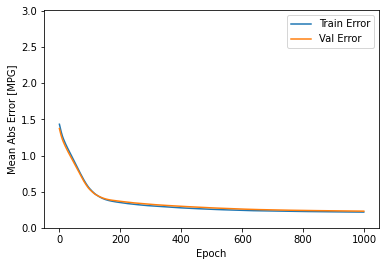

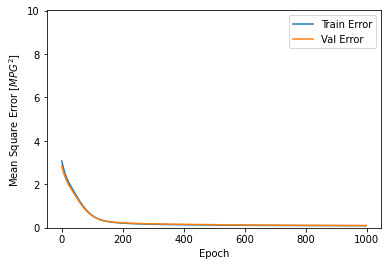

In [71]:
plot_history(history)

**Testar modelo**

In [24]:
d_test = pd.read_csv("dataset_teste.csv")
d_test = d_test.astype('float32')

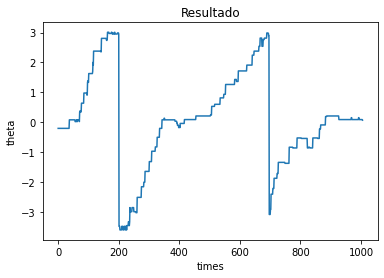

In [72]:
y_pred = model.predict(d_test)

visualizar(y_pred)

**Exportar para tflite**

In [73]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('regressor.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Joelp\AppData\Local\Temp\tmpeyfsx4zk\assets


INFO:tensorflow:Assets written to: C:\Users\Joelp\AppData\Local\Temp\tmpeyfsx4zk\assets


**Testar modelo exportado**

In [25]:
d_test_shape = np.shape(d_test)

In [35]:
interpreter = tf.lite.Interpreter(model_path="regressor.tflite")
interpreter.resize_tensor_input(0, [d_test_shape[0],d_test_shape[1]])
interpreter.allocate_tensors()

inputs = interpreter.tensor(interpreter.get_input_details()[0]['index'])
outputs = interpreter.tensor(interpreter.get_output_details()[0]['index'])

interpreter.set_tensor(0,d_test)
interpreter.invoke()

y_pred = outputs()

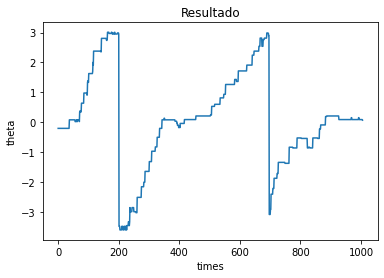

In [36]:
visualizar(y_pred)